# Q Learning

Reinforcement learning <-> requires an agent which looks at the enviroment.
Agent <-> exploring an enviroment. Say Playing games, i.e. machine playing games.
States(say health of agent in a game, mostly location, where the agent is in the environemt) <-> stages <-> position <-> 

- Environemt
- Agent
- State
- Action
- Reward (which action maximizes it)

Enviroment Exploraion

- Randomly picking a valid action
- Using the current Q-Table to find the best action.

Updating Q-Values

$Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action])$

- $\alpha$ is the learning rate (how much are we allowed to update Q Value by in each Qtable update).
- $\gamma$ is the discount factor (balance b/w future possible rewards and current)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Matrix with column as actions and rows as state, stores reward

#### Introduction to gym

In [2]:
import gym

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
print(env.observation_space.n)

16


In [5]:
print(env.action_space.n) # left, down, up, right

4


In [6]:
env.reset()

0

In [7]:
action = env.action_space.sample()

In [8]:
print(action)

3


In [9]:
observation, reward, done, info = env.step(action)

In [10]:
env.render()

  (Up)
SFFF
FHFH
FFFH
HFFG


In [11]:
env.reset()

0

In [12]:
action = env.action_space.sample()

In [13]:
new_state, reward, done, info = env.step(action)

In [14]:
env.render()

  (Left)
SFFF
FHFH
FFFH
HFFG


#### Creating the model

In [15]:
import numpy as np
import time

newenv = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [16]:
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### Constants

In [17]:
EPISODES = 2000 # how many times to run the enviroment from the beggining
MAX_STEPS = 100 # max number of steps allowed for each run of enviroment

LEARNING_RATE = 0.01
GAMMA = 0.96

#### Picking an Action

- Randomly picking a valid action
- Using the current Q-Table to find the best action

In [18]:
epsilon = 0.9

if np.random.uniform(0, 1) < epsilon:
  action = newenv.action_space.sample()
else:
  action = np.argmax(Q[state, 1])

#### Updating the Q Values

Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

In [29]:
realenv = gym.make('FrozenLake-v0')
R_STATES = realenv.observation_space.n
R_ACTIONS = realenv.action_space.n

Q = np.zeros((R_STATES, R_ACTIONS))

EPISODES = 1500 # how many times to run the enviroment from the beggining
MAX_STEPS = 100 # max number of steps allowed for each run of enviroment

LEARNING_RATE = 0.81
GAMMA = 0.96
RENDER = True
epsilon = 0.9

rewards = []

for episode in range(EPISODES):
  state = realenv.reset()
  for _ in range(MAX_STEPS):
    if RENDER:
      realenv.render()
    if np.random.uniform(0, 1) < epsilon:
      action = realenv.action_space.sample()
    else:
      action = np.argmax(Q[state, :])
    next_state, reward, done, _ = realenv.step(action)
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state
    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break # goal reached
print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")


Streaming output truncated to the last 5000 lines.
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
H

#### Plotting

Text(0, 0.5, 'average reward')

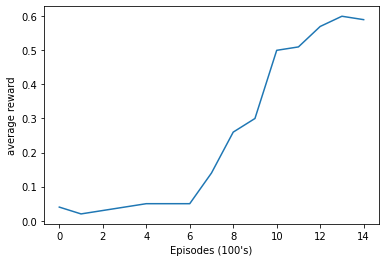

In [30]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.xlabel('Episodes (100\'s)')
plt.ylabel('average reward')
